# Project: tmdb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The Dataset 'tmdb-movies.csv' contains films from 'The Movie Data Base' (tmdb) from 1966 till 2015. Beisde the rating of the movie, which will be used as the dependent variable, there is the following data included: 

id	imdb_id	popularity	budget	revenue	original_title	cast	homepage	director	tagline	keywords	overview	runtime	genres	production_companies	release_date	vote_count	release_year	budget_adj	revenue_adj

In the analysis the following questions will be answered:
1. Which genres are most popular (highest rating) and how does this change over the years?
2. What is the impact of runtime on the rating?
3. What is the correlation of revenue and rating?
4. What is the correlation of budget and rating?
5. Which are the top 5 directors according to their top rating?
6. Which are the top 5 directors according to revenue?

In [1]:
#Importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#Exploring the data frame
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df.shape

(10866, 21)

The dataset has 21 poperties (columns) and 10866 different movies (rows).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#Looking at the vote_count distribution in order to set a threshold
df.vote_count.describe()

count    10866.000000
mean       217.389748
std        575.619058
min         10.000000
25%         17.000000
50%         38.000000
75%        145.750000
max       9767.000000
Name: vote_count, dtype: float64

In [7]:
#Looking at the genres column because it needed to be split up in order to compare them
df.genres.head(10)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

In [8]:
#Looking at the directors column because it needed to be split up in order to compare them
df.director.head(10)

0                   Colin Trevorrow
1                     George Miller
2                  Robert Schwentke
3                       J.J. Abrams
4                         James Wan
5    Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                       Alan Taylor
7                      Ridley Scott
8          Kyle Balda|Pierre Coffin
9                       Pete Docter
Name: director, dtype: object

### Data Cleaning

1. The following columns will be dropped since they are not needed to answer the proposed questions:

- id, imdb_id, popularity, original_title, cast, homepage, tagline, keywords, overview, production_companies

- buget (budget_adj will be used)

- revenue (revenue_adj will be used)

- release_date (release_year will be used)

2. A threshold of 100 will be used for votecount to get only movies that got at least 100 votes and therefore have a meaningful rating (vote_average).
3. The genres have to be split up in order to make a comparison possible
4. Directors have to be split up as well to answer questions 5 and 6.

In [9]:
# Step1
df.drop(['id', 'imdb_id', 'popularity', 'original_title', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget', 'revenue', 'release_date'], axis=1, inplace = True)


In [10]:
#Checking if Step1 worked
df.head()

,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


We now got only the columns we need for the analysis.

In [11]:
# Step2
vote100 = df.query('vote_count >= 100')
vote100

,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...
10762,Michael Cimino,183,Drama|War,464,7.4,1978,5.014051e+07,1.671350e+08
10764,Lou Adler,86,Comedy,103,6.5,1978,0.000000e+00,1.390259e+08
10770,Alan Parker,121,Drama|Crime,141,7.5,1978,7.688212e+06,1.169945e+08
10820,Chuck Jones|Ben Washam,26,Animation|Family|Comedy,286,7.1,1966,2.116175e+06,0.000000e+00


In [12]:
#Checking if Step2 worked
vote100.vote_count.describe()

count    3329.000000
mean      639.655452
std       907.447159
min       100.000000
25%       168.000000
50%       302.000000
75%       689.000000
max      9767.000000
Name: vote_count, dtype: float64

The minimum for vote_count is now 100 and therefore the rating (vote_average) should be reliable.

Furthermore the number of films was reduced to 3329 which still are enough to answer the questions.

In [13]:
#Looking for empty cells
vote100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 0 to 10825
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   director      3329 non-null   object 
 1   runtime       3329 non-null   int64  
 2   genres        3329 non-null   object 
 3   vote_count    3329 non-null   int64  
 4   vote_average  3329 non-null   float64
 5   release_year  3329 non-null   int64  
 6   budget_adj    3329 non-null   float64
 7   revenue_adj   3329 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 234.1+ KB


There are no empty cells so no further trimming needed.

In [14]:
#Step 3
from itertools import chain

cols = vote100.columns.difference(['genres'])
genres = vote100['genres'].str.split('|')

multi_genre =  (vote100.loc[vote100.index.repeat(genres.str.len()), cols].assign(genres=list(chain.from_iterable(genres.tolist()))))
multi_genre

,budget_adj,director,release_year,revenue_adj,runtime,vote_average,vote_count,genres
0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Action
0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Adventure
0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Science Fiction
0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Thriller
1,1.379999e+08,George Miller,2015,3.481613e+08,120,7.1,6185,Action
...,...,...,...,...,...,...,...,...
10820,2.116175e+06,Chuck Jones|Ben Washam,1966,0.000000e+00,26,7.1,286,Family
10820,2.116175e+06,Chuck Jones|Ben Washam,1966,0.000000e+00,26,7.1,286,Comedy
10825,0.000000e+00,Michelangelo Antonioni,1966,0.000000e+00,111,6.8,103,Drama
10825,0.000000e+00,Michelangelo Antonioni,1966,0.000000e+00,111,6.8,103,Mystery


Used a method found on [Stack Overflow](https://stackoverflow.com/questions/52575290/how-to-separate-string-into-multiple-rows-in-pandas) in order to achieve step 3.

The rows increased to 9009 because each film with multiple genres now got a seperate line for each genre. 

The number of unique indexes should still be the same.

In [15]:
multi_genre.index.nunique()

3329

As expected the number of unique indexes and therefore unique films is still 3329.


Repeating step 3 for the directors column in order to split up the movies with multiple directors into different rows:

In [16]:
#New index is needed in order to use the split method from step3. The old index is still kept in the column "identifier" in order to identify unique films.
multi_genre = multi_genre.reset_index().rename(columns={'index': 'identifier'})
multi_genre

,identifier,budget_adj,director,release_year,revenue_adj,runtime,vote_average,vote_count,genres
0,0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Action
1,0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Adventure
2,0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Science Fiction
3,0,1.379999e+08,Colin Trevorrow,2015,1.392446e+09,124,6.5,5562,Thriller
4,1,1.379999e+08,George Miller,2015,3.481613e+08,120,7.1,6185,Action
...,...,...,...,...,...,...,...,...,...
9004,10820,2.116175e+06,Chuck Jones|Ben Washam,1966,0.000000e+00,26,7.1,286,Family
9005,10820,2.116175e+06,Chuck Jones|Ben Washam,1966,0.000000e+00,26,7.1,286,Comedy
9006,10825,0.000000e+00,Michelangelo Antonioni,1966,0.000000e+00,111,6.8,103,Drama
9007,10825,0.000000e+00,Michelangelo Antonioni,1966,0.000000e+00,111,6.8,103,Mystery


In [17]:
#Step4
from itertools import chain

cols2 = multi_genre.columns.difference(['director'])
director = multi_genre['director'].str.split('|')

df_final =  (multi_genre.loc[multi_genre.index.repeat(director.str.len()), cols2].assign(director=list(chain.from_iterable(director.tolist()))))
df_final

,budget_adj,genres,identifier,release_year,revenue_adj,runtime,vote_average,vote_count,director
0,1.379999e+08,Action,0,2015,1.392446e+09,124,6.5,5562,Colin Trevorrow
1,1.379999e+08,Adventure,0,2015,1.392446e+09,124,6.5,5562,Colin Trevorrow
2,1.379999e+08,Science Fiction,0,2015,1.392446e+09,124,6.5,5562,Colin Trevorrow
3,1.379999e+08,Thriller,0,2015,1.392446e+09,124,6.5,5562,Colin Trevorrow
4,1.379999e+08,Action,1,2015,3.481613e+08,120,7.1,6185,George Miller
...,...,...,...,...,...,...,...,...,...
9005,2.116175e+06,Comedy,10820,1966,0.000000e+00,26,7.1,286,Chuck Jones
9005,2.116175e+06,Comedy,10820,1966,0.000000e+00,26,7.1,286,Ben Washam
9006,0.000000e+00,Drama,10825,1966,0.000000e+00,111,6.8,103,Michelangelo Antonioni
9007,0.000000e+00,Mystery,10825,1966,0.000000e+00,111,6.8,103,Michelangelo Antonioni


In [18]:
#Check if uniquie films are still the same:
df_final.identifier.nunique()

3329

The unique number of films is still the same with 3329. Over all there are now 9967 rows in the dataset since the genres and directors are all split into single lines 
in order to compare them in the further steps.

<a id='eda'></a>
## Exploratory Data Analysis



### 1. Which genres are most popular (highest rating) and how does this change over the years?

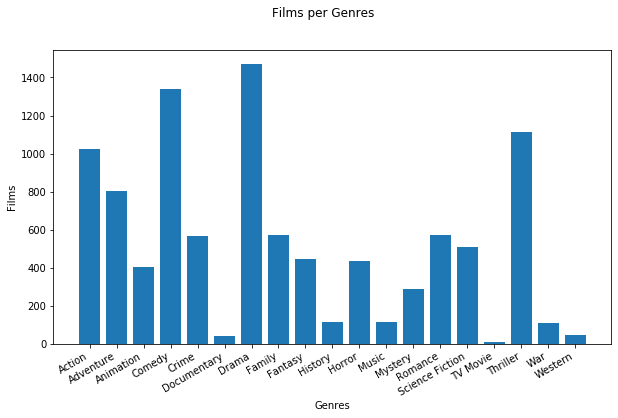

In [19]:
#genres as labels
labels = df_final.genres.unique()
labels.sort()
#number of films per genre as values
values = df_final.groupby('genres')['identifier'].count()

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Films per Genres')

ax.bar(labels, values)
ax.set_ylabel('Films')
ax.set_xlabel('Genres')
fig.autofmt_xdate();


The most films are in the genres Darma, Comedy, Thriller, Action and Adventure.

In the next step we will look at the mean rating of each gerne:

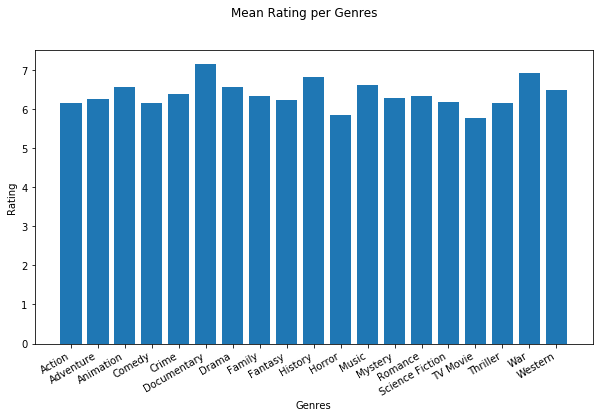

In [20]:
#genres as labels
labels = df_final.genres.unique()
labels.sort()
#mean rating (vote_average) per genre as values
values = df_final.groupby('genres')['vote_average'].mean()

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Mean Rating per Genres')

ax.bar(labels, values)
ax.set_ylabel('Rating')
ax.set_xlabel('Genres')
fig.autofmt_xdate();

In [21]:
values.sort_values()

genres
TV Movie           5.770000
Horror             5.851259
Thriller           6.144554
Comedy             6.146372
Action             6.155186
Science Fiction    6.174656
Fantasy            6.219463
Adventure          6.259726
Mystery            6.289199
Family             6.331283
Romance            6.337018
Crime              6.372359
Western            6.493617
Drama              6.564130
Animation          6.566832
Music              6.605263
History            6.821622
War                6.920000
Documentary        7.157500
Name: vote_average, dtype: float64

The highest mean rating is in the genre Documentary with 7.18 followed by War with 6.92. Looking at the number of films per genre we can say, that in these categories are just very few films. Out of the genres with the 5 most films Darma has the highest rating with 6.56.

In order to answer the question how the most popular genres change over the years we will split the films into 3 categories:
1. 1966 - 1985
2. 1986 - 2000
3. 2001 - 2015

In [22]:
#Creating the 3 groups
category1 = df_final.query('release_year < 1986')
category2 = df_final.query('release_year >= 1986 & release_year <= 2000')
category3 = df_final.query('release_year > 2000')

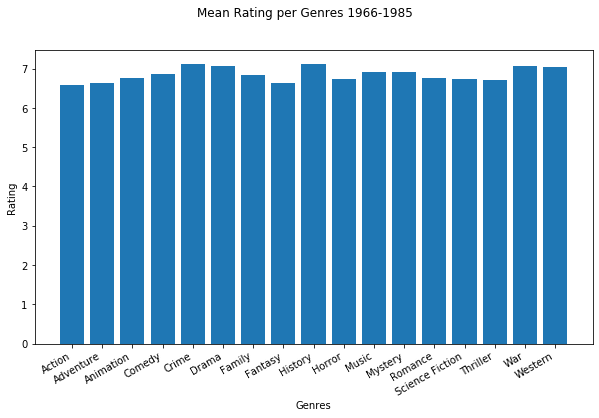

In [23]:
#genres as labels
labels = category1.genres.unique()
labels.sort()
#mean rating (vote_average) per genre as values for category1
values1 = category1.groupby('genres')['vote_average'].mean()

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Mean Rating per Genres 1966-1985')

ax.bar(labels, values1)
ax.set_ylabel('Rating')
ax.set_xlabel('Genres')
fig.autofmt_xdate();

In [24]:
values1.sort_values()

genres
Action             6.593243
Fantasy            6.640625
Adventure          6.641860
Thriller           6.708824
Horror             6.726316
Science Fiction    6.738000
Romance            6.762857
Animation          6.770000
Family             6.848387
Comedy             6.864474
Music              6.921429
Mystery            6.926316
Western            7.037500
Drama              7.062857
War                7.064706
History            7.112500
Crime              7.124324
Name: vote_average, dtype: float64

From 1966-1985 the top rated genres are Crime (7.12), History (7.11), War (7.06) and Drama (7.06)

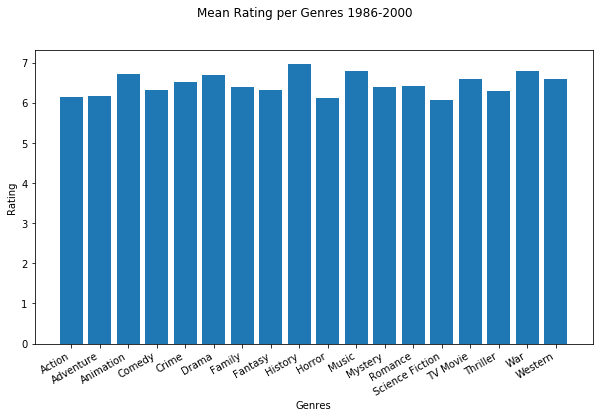

In [25]:
#genres as labels
labels = category2.genres.unique()
labels.sort()
#mean rating (vote_average) per genre as values for category2
values2 = category2.groupby('genres')['vote_average'].mean()

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Mean Rating per Genres 1986-2000')

ax.bar(labels, values2)
ax.set_ylabel('Rating')
ax.set_xlabel('Genres')
fig.autofmt_xdate();

In [26]:
values2.sort_values()

genres
Science Fiction    6.067826
Horror             6.126389
Action             6.142241
Adventure          6.168750
Thriller           6.290295
Fantasy            6.309483
Comedy             6.312709
Mystery            6.386486
Family             6.404667
Romance            6.418803
Crime              6.506452
TV Movie           6.600000
Western            6.600000
Drama              6.683125
Animation          6.715909
Music              6.785185
War                6.800000
History            6.971429
Name: vote_average, dtype: float64

From 1986-2000 the top rated genres are History (6.97), War (6.80), Music (6.79), Animation (6.71) and Drama (6.68)

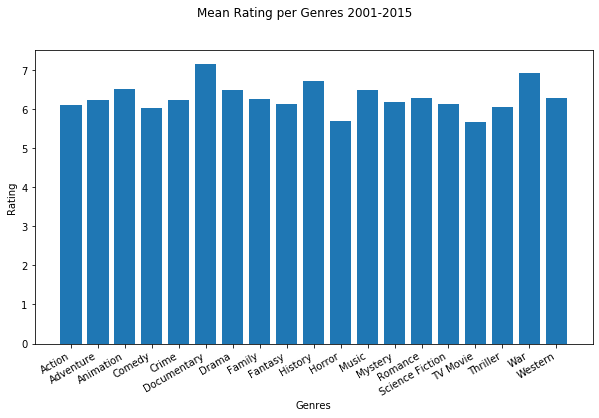

In [27]:
#genres as labels
labels = category3.genres.unique()
labels.sort()
#mean rating (vote_average) per genre as values for category3
values3 = category3.groupby('genres')['vote_average'].mean()

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Mean Rating per Genres 2001-2015')

ax.bar(labels, values3)
ax.set_ylabel('Rating')
ax.set_xlabel('Genres')
fig.autofmt_xdate();

In [28]:
values3.sort_values()

genres
TV Movie           5.677778
Horror             5.688991
Comedy             6.037942
Thriller           6.054094
Action             6.114106
Science Fiction    6.128488
Fantasy            6.139465
Mystery            6.189691
Adventure          6.230344
Crime              6.243085
Family             6.261598
Western            6.273077
Romance            6.278469
Drama              6.477746
Music              6.478082
Animation          6.508784
History            6.716216
War                6.920833
Documentary        7.157500
Name: vote_average, dtype: float64

From 1986-2000 the top rated genres are Documentary (7.15), War (6.92), History (6.72), Animation (6.51) and Music (6.48)
Documentary is new in this category and similar to History. This explains why it pops up here the first time.

### 2. What is the impact of runtime on the rating?

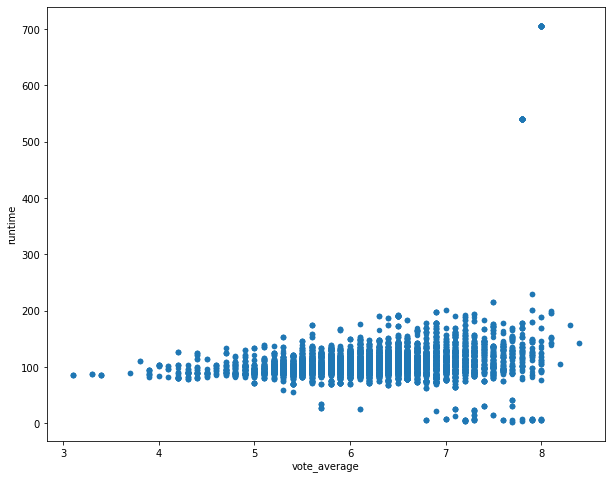

In [29]:
df_final.plot.scatter('vote_average','runtime', figsize =(10,8));

In [30]:
df_final.runtime.describe()

count    9967.000000
mean      109.355172
std        43.916522
min         3.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       705.000000
Name: runtime, dtype: float64

There is no significant correlation between runtime and rating. But we see that badly rated movies are closer to the mean runtime. While movies deveating from the mean runtime are higher rated.

### 3. What is the correlation of revenue and rating?

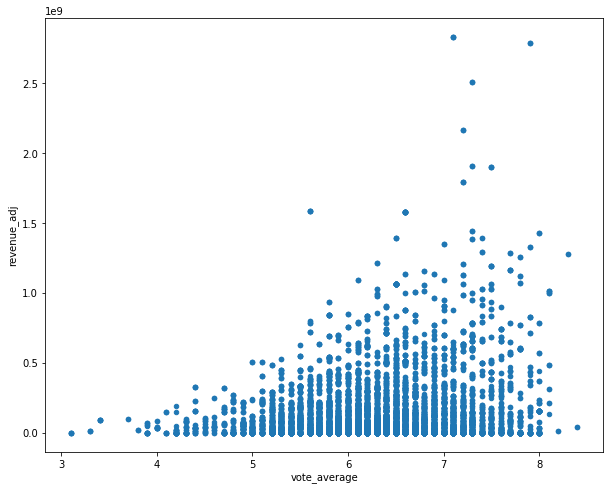

In [31]:
df_final.plot.scatter('vote_average', 'revenue_adj', figsize =(10,8));

The graph looks like a positive correlation between the rating and revenue. While there are some outlier.

### 4. What is the correlation of budget and rating?

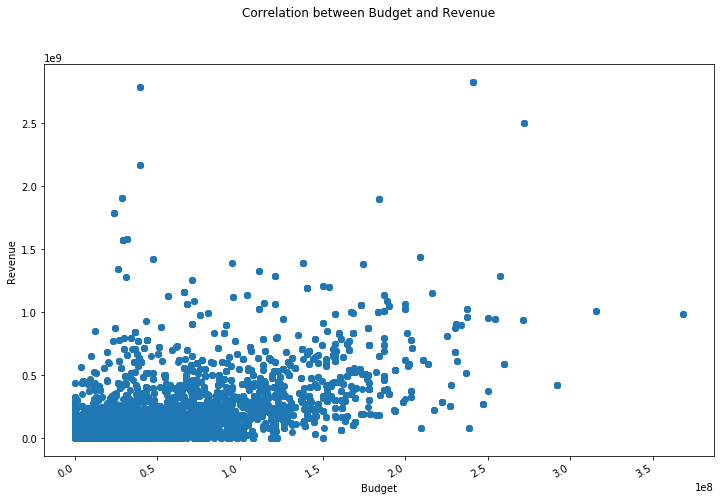

In [32]:
#budget as x values
xbudget = df_final.budget_adj
#revenue as y values
yrev= df_final.revenue_adj

fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Correlation between Budget and Revenue')

ax.scatter(xbudget, yrev)
ax.set_ylabel('Revenue')
ax.set_xlabel('Budget')
fig.autofmt_xdate();

The graph shows a weak positive correlation between budget and revenue.

### 5. Which are the top 5 directors according to their top rating?

In [33]:
topdirectors = df_final.groupby('director')['vote_average'].max()
topdirectors.sort_values(ascending = False, inplace = True)
topdirectors.head(10)

director
Frank Darabont          8.4
Francis Ford Coppola    8.3
Damien Chazelle         8.2
Christopher Nolan       8.1
Steven Spielberg        8.1
Quentin Tarantino       8.1
Robert Zemeckis         8.1
David Fincher           8.1
Patrick Osborne         8.0
Mikael Salomon          8.0
Name: vote_average, dtype: float64

The top 5 directors with the highest rating on their best film are Frank Darabont (8.4) and Francis Ford Coppola (8.3). Place 3 is shared with a rating of 8.1 between Damien Chazelle, Christopher Nolan, Steven Spielberg, Quentin Tarantino, Robert Zemeckis and David Fincher. 

### 6. Which are the top 5 directors according to revenue?

In [34]:
topdirectors2 = df_final.groupby('director')['revenue_adj'].max()
topdirectors2.sort_values(ascending = False, inplace = True)
topdirectors2.head(5)

director
James Cameron       2.827124e+09
George Lucas        2.789712e+09
William Friedkin    2.167325e+09
Steven Spielberg    1.907006e+09
J.J. Abrams         1.902723e+09
Name: revenue_adj, dtype: float64

In [36]:
topdirectors2 = df_final.groupby('director')['revenue_adj'].sum()
topdirectors2.sort_values(ascending = False, inplace = True)
topdirectors2.head(5)

director
Steven Spielberg    4.073142e+10
James Cameron       2.460985e+10
Robert Zemeckis     2.019087e+10
Peter Jackson       1.914196e+10
George Lucas        1.839010e+10
Name: revenue_adj, dtype: float64

The top 5 directors according to maximum revenue per film are James Cameron, George Lucas, William Friedkin, Steven Spielberg and J.J. Abrams
The top 5 directors according to aggregated revenue are Steven Spielberg, James Cameron, Robert Zemeckis, Peter Jackson and Georg Lucas.

<a id='conclusions'></a>
## Conclusions

In summary we can say that popular genres didn't change that much over time. History, War and in recent years Documentary (new in the category from 2001 on) were always in the top 5. Animation became more popular after the first category (1985). While Crime lost its poleposition and only came in 8th (in the 2nd category and 10th in the 3rd). On the bottom ranks Action and Fantasy (category1) lost its place to Sci-Fi and Horror (category2). While Sci-Fi was able to make a comeback after 2001 Horror stayed on the 2nd last place and got only overtaken by TV Movies.

The runtime doesn't have much of an impact on the rating. While higher revenue according to the graph seems to correlate with a higher rating.
While according to the graph some budget is necessary to create a blockbuster with a lot of revenue it seems that a lot of budget doesnt guarantee one.

When looking at the top directors its interesting, that the top directors of rated movies aren't consistent with the directors of the higest earning movies. Steven Spielberg is the only one who appears in both lists.

Disclaimer:
No statistcs were used during this analysis therefore the results are tentative and could be improved using more elaborate statistical methods. 